<a href="https://colab.research.google.com/github/marastika/Cyber_Attack_Detection.ipynb/blob/main/Cyber_Attack_Detection_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset includes nine types of attacks, including:

Fuzzers: Attack that involves sending random data to a system to test its resilience and identify any vulnerabilities.

Analysis: A type of attack that involves analyzing the system to identify its weaknesses and potential targets for exploitation.

Backdoors: Attack that involves creating a hidden entry point into a system for later use by the attacker.

DoS (Denial of Service): Attack that aims to disrupt the normal functioning of a system, making it unavailable to its users.

Exploits: Attack that leverages a vulnerability in a system to gain unauthorized access or control.

Generic: A catch-all category that includes a variety of different attack types that do not fit into the other categories.

Reconnaissance: Attack that involves gathering information about a target system, such as its vulnerabilities and potential entry points, in preparation for a future attack.

Shellcode: Attack that involves executing malicious code, typically in the form of shell scripts, on a target system.

Worms: A type of malware that spreads itself automatically to other systems, often causing harm in the process.

These nine categories cover a wide range of attack types that can be used to exploit a system, and it is important to be aware of them to protect against potential security threats.

In [69]:
!pip install nbformat

In [ ]:
!pip install graphviz

In [ ]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

import dtreeviz

In [ ]:
training = pd.read_csv("/content/NUSW-NB15_features.csv", encoding='latin1') # Try 'latin1' encoding
testing = pd.read_csv("/content/NUSW-NB15_features.csv", encoding='latin1') # Try 'latin1' encoding
print("training ",training.shape)
print("testing ",testing.shape)

training  (49, 4)
testing  (49, 4)


In [ ]:
all(training.columns == testing.columns)


True

In [ ]:
training = pd.read_csv("/content/NUSW-NB15_features.csv", encoding='latin1')
testing = pd.read_csv("/content/NUSW-NB15_features.csv", encoding='latin1')
print("training ",training.shape)
print("testing ",testing.shape)

# Make sure 'id' column exists in training DataFrame before dropping
if 'id' in training.columns:
    training = training.drop('id', axis=1)
else:
    print("Warning: 'id' column not found in training DataFrame")

df = pd.concat([training,testing])
df = df.reset_index(drop=True)

df.head()

training  (49, 4)
testing  (49, 4)


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
df.columns

Index(['No.', 'Name', 'Type ', 'Description'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          98 non-null     int64 
 1   Name         98 non-null     object
 2   Type         98 non-null     object
 3   Description  98 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [ ]:
# Check the columns of your DataFrame
print(df.columns)

# Read the CSV files again to check their columns
training = pd.read_csv("/content/UNSW_NB15_training-set.csv", encoding='latin1')
testing = pd.read_csv("/content/UNSW_NB15_training-set.csv", encoding='latin1')
print(training.columns)
print(testing.columns)

Index(['No.', 'Name', 'Type ', 'Description'], dtype='object')
Index(['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')
Index(['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv

In [ ]:
training = pd.read_csv("/content/UNSW_NB15_training-set.csv", encoding='latin1')
testing = pd.read_csv("/content/UNSW_NB15_training-set.csv", encoding='latin1')

# Drop 'id' column from both training and testing if it exists
if 'id' in training.columns:
    training = training.drop('id', axis=1)
if 'id' in testing.columns:
    testing = testing.drop('id', axis=1)

df = pd.concat([training,testing])
df = df.reset_index(drop=True)

for col in ['proto', 'service', 'state']:
    if col in df.columns:  # Check if column exists before processing
        df[col] = df[col].astype('category').cat.codes
    else:
        print(f"Warning: Column '{col}' not found in DataFrame")

if 'attack_cat' in df.columns:
    df['attack_cat'] = df['attack_cat'].astype('category')
else:
    print("Warning: Column 'attack_cat' not found in DataFrame")

df.head()

,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0


In [ ]:
df.head()

,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0


attack_cat
Generic           35566
Exploits          20792
Fuzzers           10816
DoS                7930
Reconnaissance     6378
Analysis           1272
Backdoor           1130
Shellcode           682
Worms                80
Normal                0
Name: count, dtype: int64


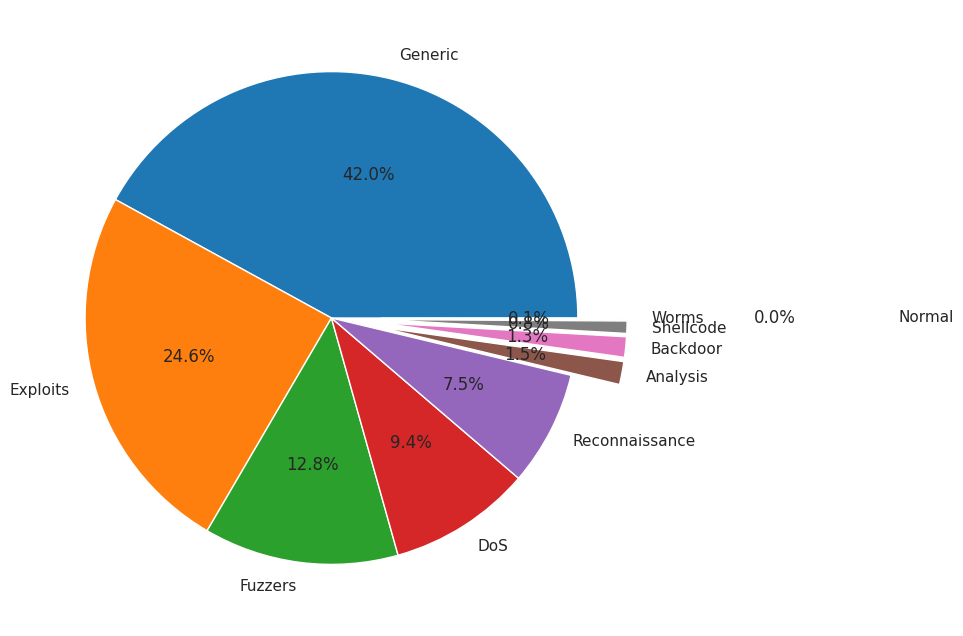

In [ ]:
# Check if 'label' column exists in the DataFrame
if 'label' in df.columns:
    validAttacks = df[df['label']==1]['attack_cat'].value_counts()
    print(validAttacks)

    !pip install matplotlib
    import matplotlib.pyplot as plt
    plt.figure(figsize = (15,8))
    plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
    plt.show()
else:
    print("Error: 'label' column not found in DataFrame. Check your data.")

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (87981, 43)
y_train shape:  (87981,)
X_test shape:  (37707, 43)
y_test shape:  (37707,)


In [ ]:
# Impute missing values in y_train (replace NaN with the most frequent value)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
y_train = imputer.fit_transform(y_train.reshape(-1, 1))  # Reshape for the imputer
y_train = y_train.ravel()  # Flatten back to original shape

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)  # Now fit with imputed y_train

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [ ]:
# Impute missing values in y_test (replace NaN with the most frequent value)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
y_test = imputer.fit_transform(y_test.reshape(-1, 1))  # Reshape for the imputer
y_test = y_test.ravel()  # Flatten back to original shape

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred) # Now calculate recall with imputed y_test
print("Recall: ", recall)

Recall:  1.0


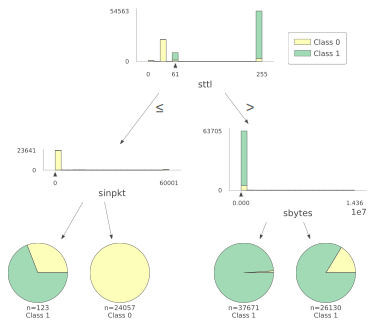

In [ ]:
# Impute missing values in y_train and ensure integer labels
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
y_train = imputer.fit_transform(y_train.reshape(-1, 1))
y_train = y_train.ravel().astype(int)  # Flatten and convert to integers

# Fit the model and create dtreeviz visualization
clf=grid_search.best_estimator_
clf.fit(X_train,y_train)

viz_model = dtreeviz.model(clf,
                           X_train=X_train_imputed, y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

In [ ]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(37707, 43)
(27416, 43)
filtered data 27.0 %


In [ ]:
from sklearn.metrics import accuracy_score, precision_score


In [ ]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test_2)

    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()

    return {'Recall' : recall}

In [ ]:
results = {}


In [ ]:
def model_evaluation(model):
    # Use the imputed training data
    model.fit(X_train_imputed,y_train)
    y_pred = model.predict(X_test_2_imputed) # Use imputed test data

    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()

    return {'Recall' : recall}

Recall:  1.0
Precision:  0.9997641880207514
Accuracy:  0.9997811496936095


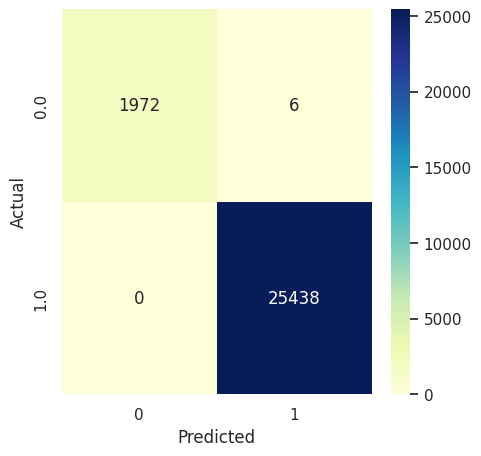

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

In [ ]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- dpkts <= 0.50
|   |--- sttl <= 61.00
|   |   |--- ï»¿id <= 44890.50
|   |   |   |--- ct_srv_dst <= 2.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- ct_srv_dst >  2.50
|   |   |   |   |--- ct_srv_dst <= 3.50
|   |   |   |   |   |--- proto <= 113.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- proto >  113.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ct_srv_dst >  3.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- ï»¿id >  44890.50
|   |   |   |--- class: 1.0
|   |--- sttl >  61.00
|   |   |--- sloss <= 0.50
|   |   |   |--- sload <= 288800000.00
|   |   |   |   |--- smean <= 40.00
|   |   |   |   |   |--- ct_dst_src_ltm <= 4.50
|   |   |   |   |   |   |--- ct_srv_dst <= 9.50
|   |   |   |   |   |   |   |--- dur <= 0.00
|   |   |   |   |   |   |   |   |--- sinpkt <= 0.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- sinpkt >  0.00
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   

Recall:  0.999921377466782
Precision:  1.0
Accuracy:  0.9999270498978698


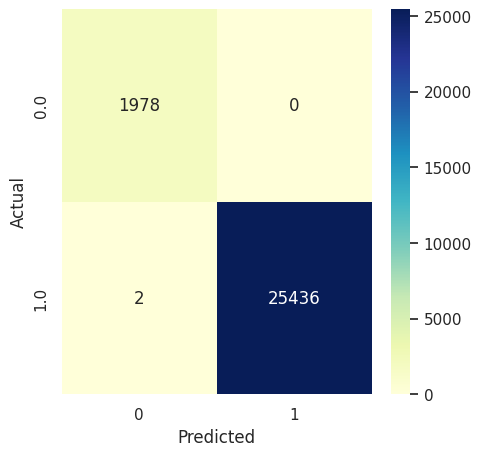

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

results['XGBoost Classifier'] = model_evaluation(xgbc)

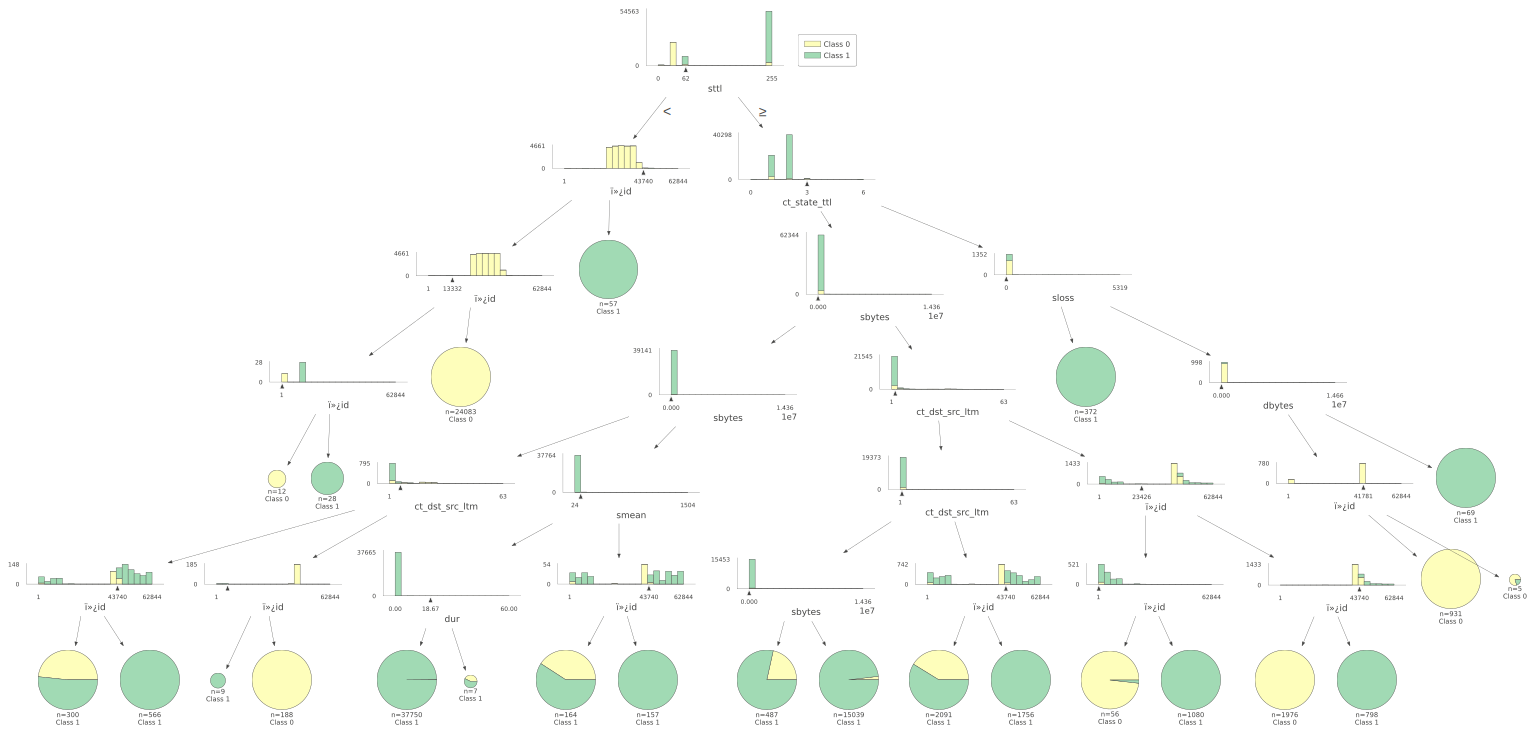

In [ ]:
!pip install dtreeviz
import pandas as pd
from xgboost import XGBClassifier
import dtreeviz

# Assuming X_train, y_train, and feature_names are already defined

# Impute or remove NaN values in X_train
X_train_imputed = X_train.fillna(X_train.mean())  # Replace NaNs with column means (example)

xgbc = XGBClassifier()
xgbc.fit(X_train_imputed, y_train)  # Fit the model with imputed data

viz_model = dtreeviz.model(xgbc,
                           tree_index=1,
                           X_train=X_train_imputed,  # Use imputed data
                           y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

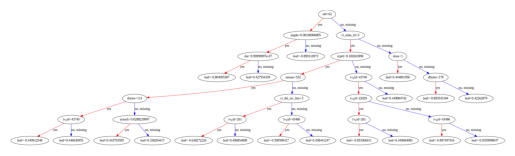

In [ ]:
import xgboost
# Assuming 'xgbc' is your trained XGBoost model
xgboost.plot_tree(xgbc,figsize = (20,12)) # Use the xgboost plotting function
plt.show()

[LightGBM] [Info] Number of positive: 59210, number of negative: 28771
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6249
[LightGBM] [Info] Number of data points in the train set: 87981, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.672986 -> initscore=0.721723
[LightGBM] [Info] Start training from score 0.721723
Recall:  1.0
Precision:  1.0
Accuracy:  1.0


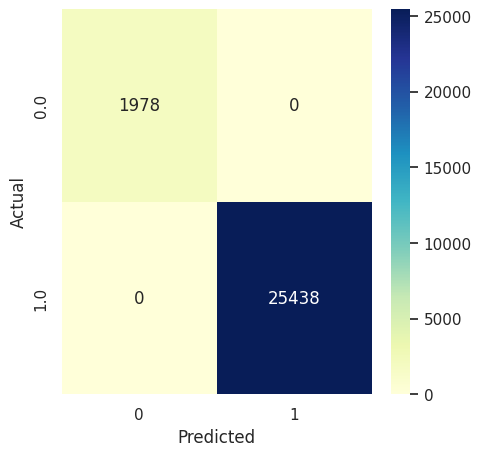

In [ ]:
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier()

results['Light GBM Classifier'] = model_evaluation(lgbc)

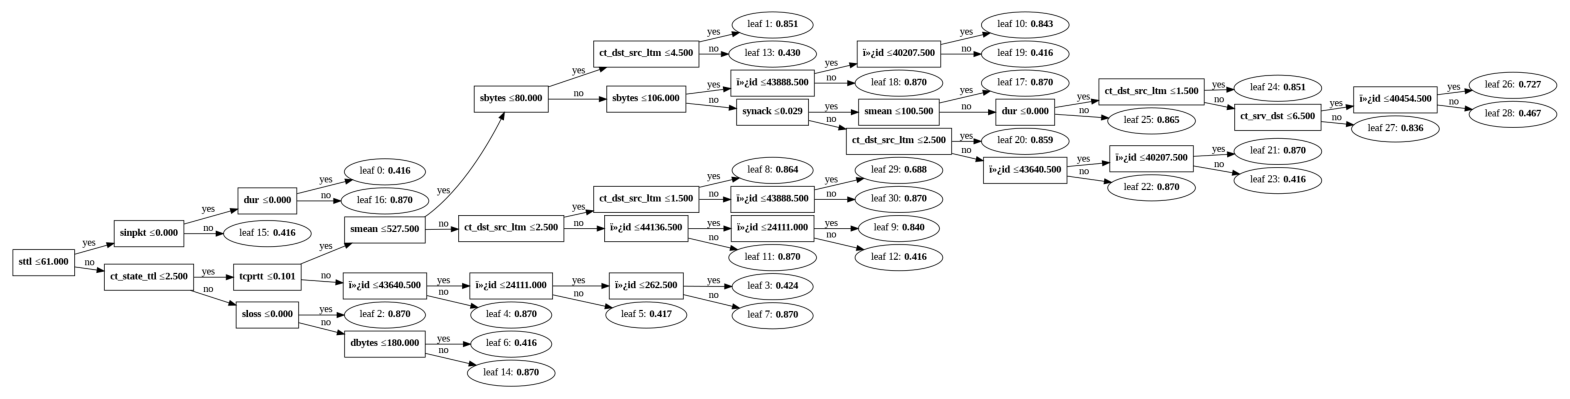

In [ ]:
import lightgbm

lightgbm.plot_tree(lgbc,figsize = (20,12))
plt.show()

In [ ]:
comparision = pd.DataFrame(results)
comparision

,Random Forest Model,XGBoost Classifier,Light GBM Classifier
Recall,1.0,0.999921,1.0


In [ ]:
from scipy.stats import wilcoxon

z_statistic, p_value = wilcoxon([comparision.iloc[0][0], comparision.iloc[0][1], comparision.iloc[0][2]])

# Print the results
print('Z-statistic:', z_statistic)
print('p-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('The difference in the recall of the three models is statistically significant.')
else:
    print('The difference in the recall of the three models is not statistically significant.')

Z-statistic: 0.0
p-value: 0.25
The difference in the recall of the three models is not statistically significant.


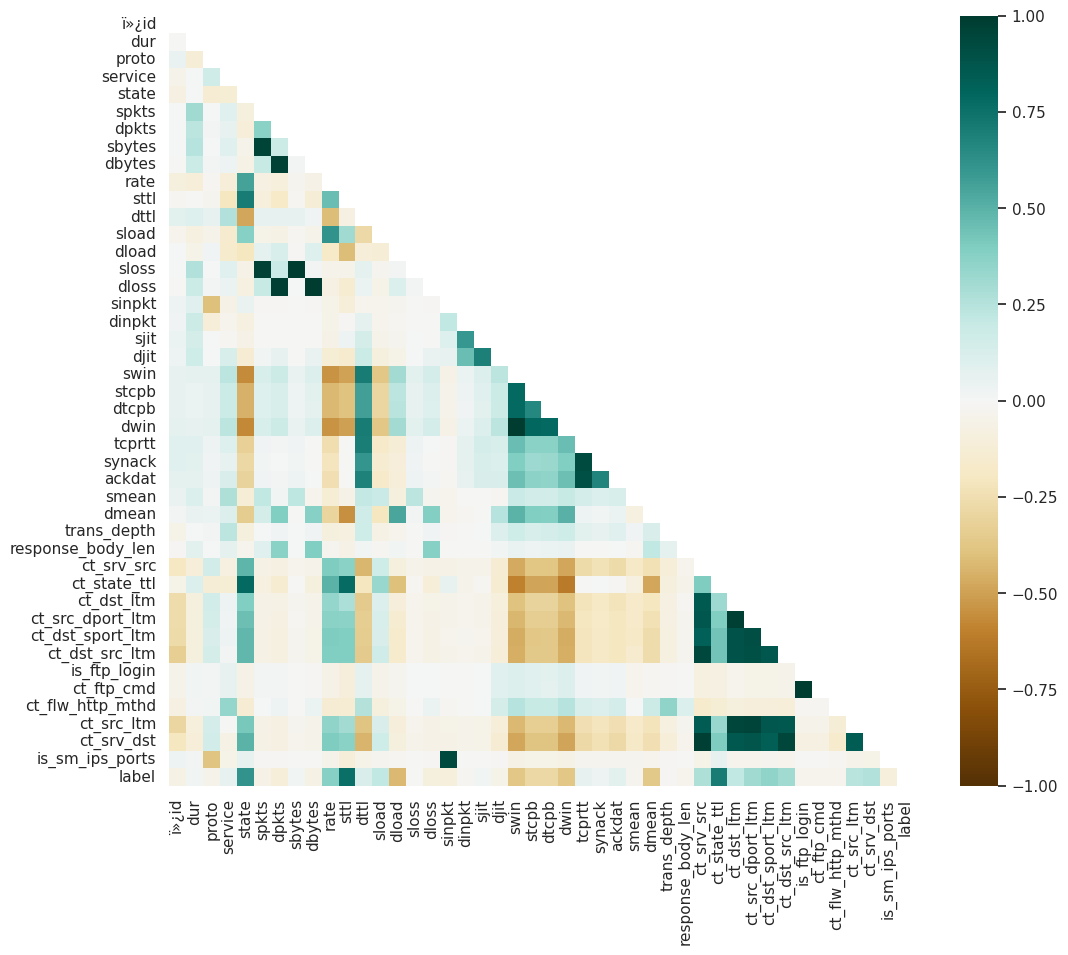

In [ ]:
plt.figure(figsize=(12, 10))

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Use the built-in bool type instead of np.bool
mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool))
sns.heatmap(numerical_df.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)
plt.show()

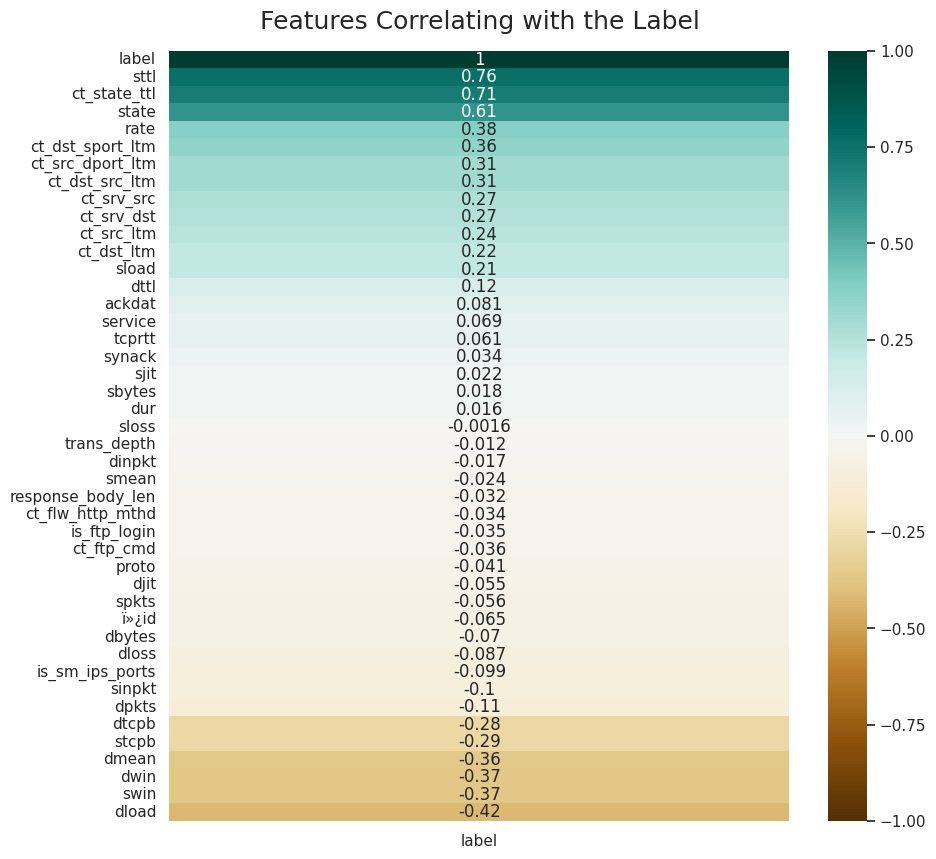

In [ ]:
plt.figure(figsize=(10, 10))

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

heatmap = sns.heatmap(numerical_df.corr()[['label']].sort_values(by='label', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)
plt.show()

In [74]:
import pandas as pd

# Replace 'your_data.csv' with the actual filename
new_data = pd.read_csv('/content/UNSW_NB15_training-set.csv')

# Filter data untuk hanya menampilkan baris yang merupakan serangan
serangan_data = new_data[new_data['label'] == 1]

# ... (rest of your code)

      id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
243  244  0.921987  ospf       -   INT     20      0    1280       0   
244  245  0.921987  ospf       -   INT     20      0    1280       0   
245  246  0.921987  ospf       -   INT     20      0    1280       0   
246  247  0.921987  ospf       -   INT     20      0    1280       0   
247  248  0.000009  sctp       -   INT      2      0     104       0   

              rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
243      20.607666  ...               1.0             2.0           0.0   
244      20.607666  ...               1.0             2.0           0.0   
245      20.607666  ...               1.0             2.0           0.0   
246      20.607666  ...               1.0             2.0           0.0   
247  111111.107200  ...               1.0             2.0           0.0   

     ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
243         0.0               0.0     

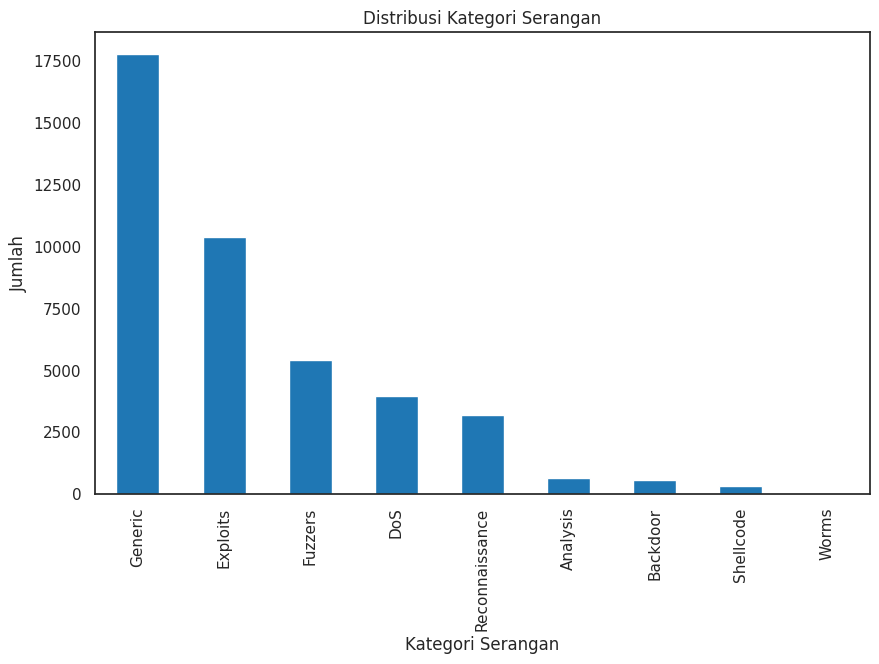

In [75]:
# Filter data untuk hanya menampilkan baris yang merupakan serangan
serangan_data = new_data[new_data['label'] == 1]

# Lihat beberapa baris pertama dari data serangan
print(serangan_data.head())

# Distribusi berdasarkan kategori serangan
attack_distribution = serangan_data['attack_cat'].value_counts()
print("\nDistribusi berdasarkan kategori serangan:")
print(attack_distribution)

# Visualisasi distribusi serangan
attack_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribusi Kategori Serangan')
plt.xlabel('Kategori Serangan')
plt.ylabel('Jumlah')
plt.show()


In [76]:
import requests

def get_geolocation(ip):
    try:
        response = requests.get(f"http://ipinfo.io/{ip}/json")
        data = response.json()
        return data.get('country', 'Unknown')
    except Exception as e:
        return 'Unknown'

# Contoh penggunaan
ip_list = ['8.8.8.8', '1.1.1.1']
countries = [get_geolocation(ip) for ip in ip_list]
print(countries)


['US', 'ID']


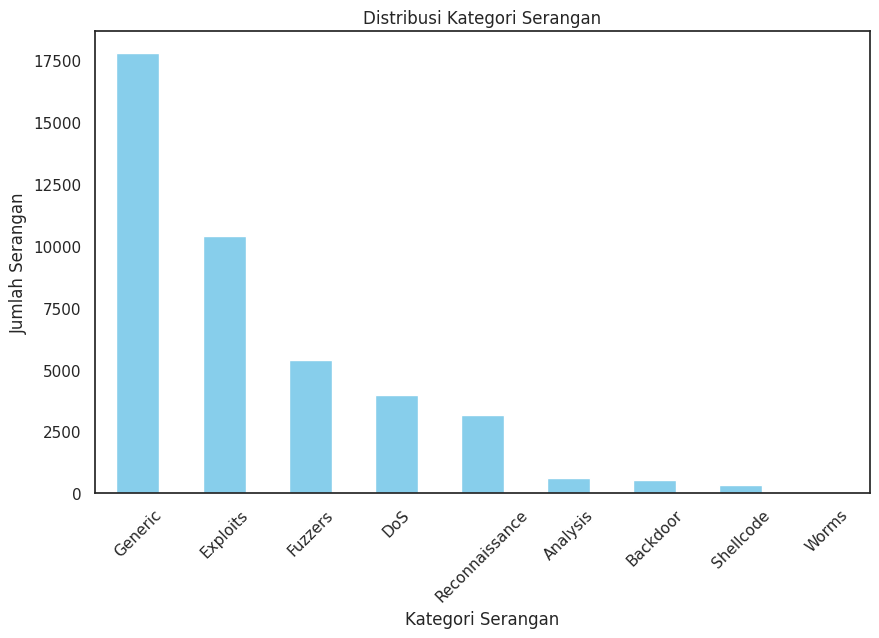

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan kita sudah memiliki dataset 'new_data'
# Filter hanya untuk baris yang merupakan serangan
serangan_data = new_data[new_data['label'] == 1]

# Distribusi berdasarkan kategori serangan
attack_distribution = serangan_data['attack_cat'].value_counts()

# Visualisasi distribusi serangan
plt.figure(figsize=(10, 6))
attack_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori Serangan')
plt.xlabel('Kategori Serangan')
plt.ylabel('Jumlah Serangan')
plt.xticks(rotation=45)
plt.show()


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan kita sudah memiliki dataset 'new_data'
# Filter hanya untuk baris yang merupakan serangan
serangan_data = new_data[new_data['label'] == 1]

# Check if 'stime' column exists
if 'stime' in serangan_data.columns:
    # Konversi kolom 'stime' menjadi datetime (jika perlu)
    serangan_data['stime'] = pd.to_datetime(serangan_data['stime'], unit='s')

    # Agregasi serangan berdasarkan hari
    serangan_per_hari = serangan_data['stime'].dt.date

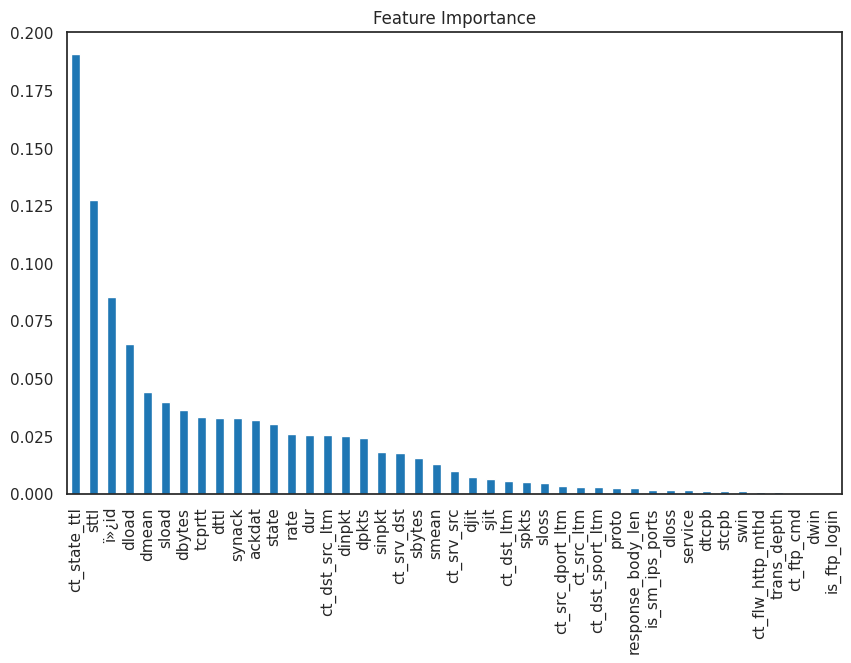

In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Asumsikan 'X' adalah fitur dan 'y' adalah target (label)
# Create an imputer to replace missing values (NaN) with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your feature matrix X and transform it
X_imputed = imputer.fit_transform(X)

# Handle missing values in 'y' - here we drop rows with NaN in 'y'
# You can choose other strategies like imputation if it suits your problem
y_no_nan = y[~pd.isnull(y)]  # Select non-missing values in 'y'
X_imputed_no_nan = X_imputed[~pd.isnull(y)]  # Select corresponding rows in X_imputed

# Now, fit the model with the imputed data and non-missing target values
model = RandomForestClassifier()
model.fit(X_imputed_no_nan, y_no_nan)

# Feature importance
importance = model.feature_importances_
feature_names = X.columns  # Use the original column names
feature_importance = pd.Series(importance, index=feature_names).sort_values(ascending=False)

# Visualisasi
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan 'stime' adalah waktu serangan dalam format datetime
# Check if 'stime' exists, if not, handle the situation accordingly
if 'stime' in serangan_data.columns:
    serangan_data.set_index('stime', inplace=True)

    # Agregasi per hari
    daily_attacks = serangan_data['label'].resample('D').sum()

    # Plot moving average
    daily_attacks.plot(label='Daily Attacks')
    daily_attacks.rolling(window=7).mean().plot(label='7-day Moving Average')
    plt.title('Serangan Harian dan Moving Average')
    plt.legend()
    plt.show()
else:
    print("Column 'stime' not found in the DataFrame. Please check your data processing steps.")

Column 'stime' not found in the DataFrame. Please check your data processing steps.


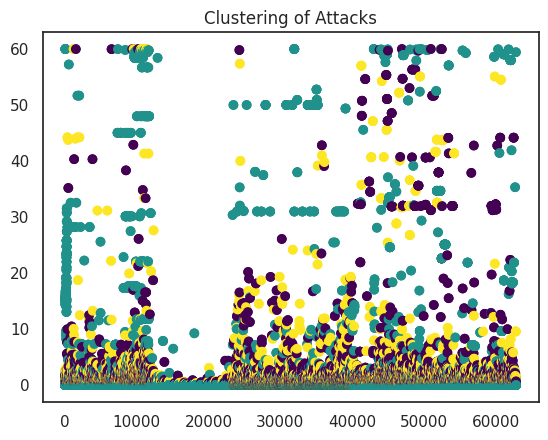

In [102]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Asumsikan 'X' adalah fitur serangan
# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now, fit KMeans with the imputed data
kmeans = KMeans(n_clusters=3)
# Predict cluster labels for the imputed data
cluster_labels = kmeans.fit_predict(X_imputed)

# Create a new DataFrame to store cluster labels with corresponding indices from X_imputed
cluster_df = pd.DataFrame({'cluster': cluster_labels}, index=range(len(cluster_labels)))

# If you want to add cluster labels to 'serangan_data', make sure they are aligned based on some common identifier
# For example, if 'serangan_data' and 'X' share a common index, you can use:
serangan_data = serangan_data.join(cluster_df, how='left')

# Visualisasi cluster (using X_imputed as it has all the data points)
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=cluster_df['cluster'], cmap='viridis')
plt.title('Clustering of Attacks')
plt.show()

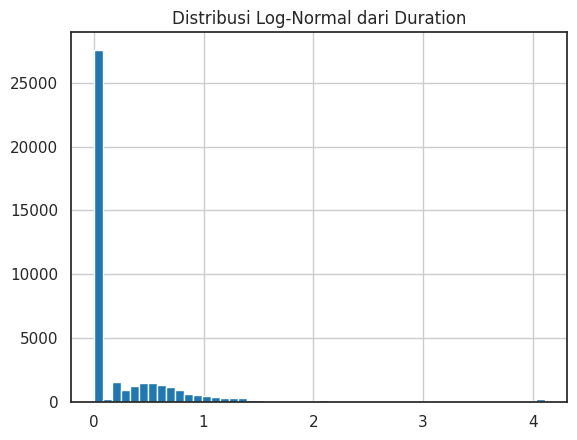

          id        dur proto service state  spkts  dpkts  sbytes   dbytes  \
262      263   7.629429   tcp    http   FIN    202   1294    9082  1747118   
303      304   9.957550   tcp    pop3   FIN    246   1554   10662  2055289   
326      327  44.225960   tcp       -   FIN     34     22   18872     1718   
359      360  28.213135  ospf       -   INT     20      0    1280        0   
360      361  28.213135  ospf       -   INT     20      0    1280        0   
...      ...        ...   ...     ...   ...    ...    ...     ...      ...   
62557  62558  21.858728  sctp       -   CON    250     24  248562     1652   
62713  62714  35.320423   udp       -   INT      4      0    2128        0   
62802  62803   9.563973   tcp       -   FIN     24     22    1272     1664   
62807  62808   9.563973   tcp       -   FIN     24     22    1272     1664   
62831  62832  59.431553   udp       -   REQ    152      0   11856        0   

             rate  ...  ct_ftp_cmd  ct_flw_http_mthd  ct_src_lt

In [105]:
import numpy as np

# Transformasi log
serangan_data['log_duration'] = np.log(serangan_data['dur'] + 1)

# Visualisasi distribusi log-normal
serangan_data['log_duration'].hist(bins=50)
plt.title('Distribusi Log-Normal dari Duration')
plt.show()

# Deteksi outliers dengan Z-score
from scipy.stats import zscore
serangan_data['zscore'] = zscore(serangan_data['log_duration'])
outliers = serangan_data[serangan_data['zscore'].abs() > 3]
print(outliers)


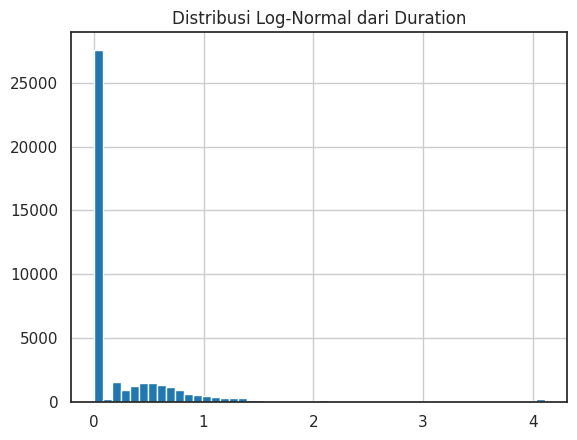

          id        dur proto service state  spkts  dpkts  sbytes   dbytes  \
262      263   7.629429   tcp    http   FIN    202   1294    9082  1747118   
303      304   9.957550   tcp    pop3   FIN    246   1554   10662  2055289   
326      327  44.225960   tcp       -   FIN     34     22   18872     1718   
359      360  28.213135  ospf       -   INT     20      0    1280        0   
360      361  28.213135  ospf       -   INT     20      0    1280        0   
...      ...        ...   ...     ...   ...    ...    ...     ...      ...   
62557  62558  21.858728  sctp       -   CON    250     24  248562     1652   
62713  62714  35.320423   udp       -   INT      4      0    2128        0   
62802  62803   9.563973   tcp       -   FIN     24     22    1272     1664   
62807  62808   9.563973   tcp       -   FIN     24     22    1272     1664   
62831  62832  59.431553   udp       -   REQ    152      0   11856        0   

             rate  ...  ct_ftp_cmd  ct_flw_http_mthd  ct_src_lt

In [110]:
import numpy as np

# Transformasi log
serangan_data['log_duration'] = np.log(serangan_data['dur'] + 1)

# Visualisasi distribusi log-normal
serangan_data['log_duration'].hist(bins=50)
plt.title('Distribusi Log-Normal dari Duration')
plt.show()

# Deteksi outliers dengan Z-score
from scipy.stats import zscore
serangan_data['zscore'] = zscore(serangan_data['log_duration'])
outliers = serangan_data[serangan_data['zscore'].abs() > 3]
print(outliers)


In [114]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Asumsikan 'X' adalah fitur dan 'y' adalah label serangan (0 atau 1)

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now, fit the Logistic Regression model with the imputed data
model = LogisticRegression()
model.fit(X_imputed, y)  # Use X_imputed instead of X
# Prediksi probabilitas (using the imputed data for prediction as well)
serangan_data['attack_probability'] = model.predict_proba(X_imputed)[:, 1]

ValueError: Input y contains NaN.

In [120]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Asumsikan 'X' adalah fitur dan 'y' adalah label serangan (0 atau 1)

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Handle NaN values in 'y' - replace with the most frequent value (mode)
y_imputed = pd.Series(y).fillna(pd.Series(y).mode()[0]).values

# Now, fit the Logistic Regression model with the imputed data
model = LogisticRegression()
model.fit(X_imputed, y_imputed)  # Use X_imputed and y_imputed

# Prediksi probabilitas (using the imputed data for prediction as well)
serangan_data['attack_probability'] = model.predict_proba(X_imputed)[:, 1] # Use X_imputed here as well

# Analisis hasil
serangan_data['attack_probability'].hist(bins=50)
plt.title('Distribusi Probabilitas Serangan')
plt.show()

ValueError: Length of values (125688) does not match length of index (42323)

In [122]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Asumsikan 'X' adalah fitur dan 'y' adalah label serangan (0 atau 1)

# Create an imputer to replace missing